In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
geography_file_llm = open('output/qa_sets_geography.json')
geography_data_llm = json.load(geography_file_llm)

In [3]:
geography_file = open('output/qa_sets_llm_kg_geography_wd_1695220184.822093.json')
geography_data = json.load(geography_file)

In [4]:
pairs = []
for i in range(len(geography_data) - 2):
    if "evaluation_score" in geography_data[str(i)]:
        if geography_data_llm[i]["llm_is_correct"]: # Filter out examples where context is needed
            pairs.append((geography_data[str(i)]["evaluation_score"], 1))
        else:
            pairs.append((geography_data[str(i)]["evaluation_score"], 0))

In [5]:
pairs_array = np.array(pairs)

In [6]:
y = pairs_array[:, 0]
x = pairs_array[:, 1]

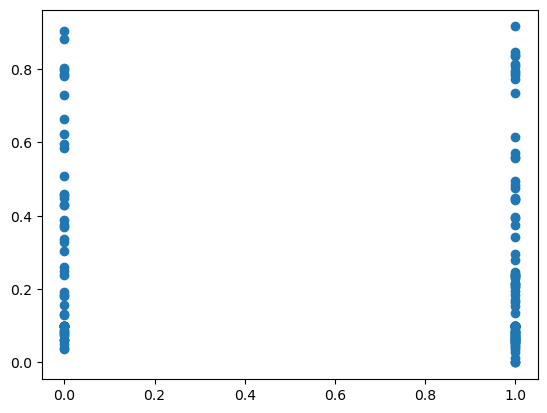

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
true_opts = pairs_array[pairs_array[:, 1] == 0][:, 0]
false_opts = pairs_array[pairs_array[:, 1] == 1][:, 0]

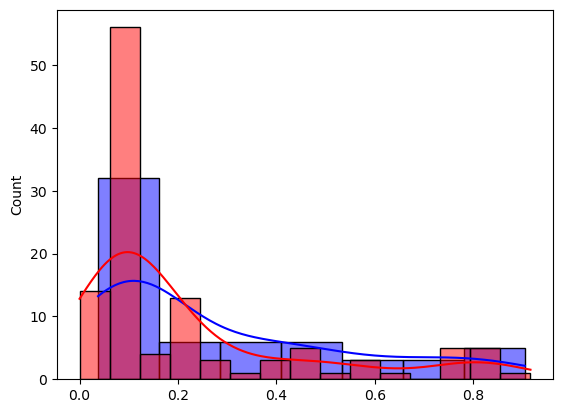

In [9]:
sns.histplot(true_opts, color='b', kde=True)
sns.histplot(false_opts, color='r', kde=True)
plt.show()